Required library imports

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf

yfinance libary can be installed with command 'pip install yfinance'. library is to get real-time and historical data of index and stocks.

downloading NIFTY 50 index data of past 5 years till now from yfinance.

In [4]:
ticker = "^NSEI"  #NIFTY 50 symbol
end = datetime.date.today()  
start = end - pd.Timedelta(days = 365*5)
data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


Exploration of downloaded data - its head, tail, statistical descriptions like mean, std

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-16,10761.500000,10762.349609,10687.849609,10700.450195,10700.450195,211000
2018-01-17,10702.450195,10803.000000,10666.750000,10788.549805,10788.549805,252700
2018-01-18,10873.400391,10887.500000,10782.400391,10817.000000,10817.000000,312000
2018-01-19,10829.200195,10906.849609,10793.900391,10894.700195,10894.700195,207600
2018-01-22,10883.200195,10975.099609,10881.400391,10966.200195,10966.200195,231600


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,17952.550781,18141.400391,17936.150391,18101.199219,18101.199219,257200
2023-01-10,18121.300781,18127.599609,17856.000000,17914.150391,17914.150391,283300
2023-01-11,17924.250000,17976.349609,17824.349609,17895.699219,17895.699219,259900
2023-01-12,17920.849609,17945.800781,17761.650391,17858.199219,17858.199219,227800
2023-01-13,17867.500000,17999.349609,17774.250000,17956.599609,17956.599609,256700


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2018-01-16 to 2023-01-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.4 KB


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,13406.484463,13475.736606,13311.318820,13395.976096,13395.976096,4.180390e+05
std,2931.757661,2939.145916,2921.237919,2932.460329,2932.460329,2.214646e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,10930.850342,10984.725342,10849.962402,10929.300049,10929.300049,2.565000e+05
50%,11958.125000,12001.625000,11882.625000,11936.000000,11936.000000,3.525500e+05
75%,16320.437744,16427.538086,16222.287598,16347.124756,16347.124756,5.552000e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


Visualizing the price data of index taking Adjascent close price in line chart using matplotlib library

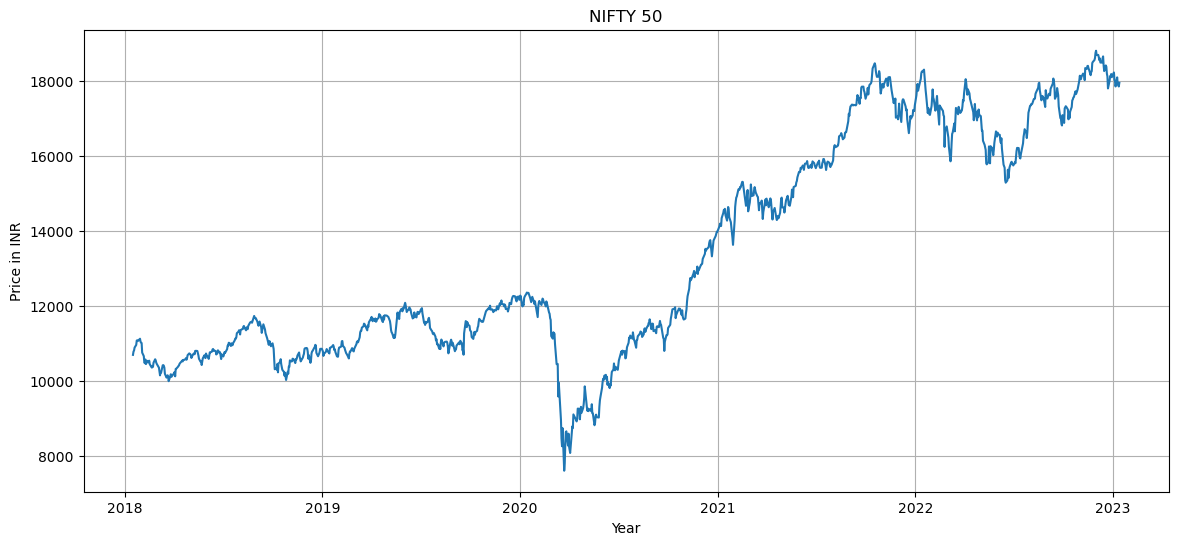

In [15]:
plt.figure(figsize=(14,6))
plt.plot(data['Adj Close'])
plt.title("NIFTY 50")
plt.xlabel("Year")
plt.ylabel("Price in INR")
plt.grid()
plt.show()

Checking the daily returns of NIFTY 50 that says if nifty today was closed this much percentage higher or lower than previous day and visualizing it then in histogram gives us an idea how volatile this index can be.

In [16]:
data['daily_returns'] = 100 * data['Adj Close'].pct_change()

Checking few rows with newly added daily returns column

In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2023-01-09,17952.550781,18141.400391,17936.150391,18101.199219,18101.199219,257200,1.353625
2023-01-10,18121.300781,18127.599609,17856.000000,17914.150391,17914.150391,283300,-1.033350
2023-01-11,17924.250000,17976.349609,17824.349609,17895.699219,17895.699219,259900,-0.102998
2023-01-12,17920.849609,17945.800781,17761.650391,17858.199219,17858.199219,227800,-0.209548
2023-01-13,17867.500000,17999.349609,17774.250000,17956.599609,17956.599609,256700,0.551010


Histogram of 5 year closing prices' daily returns percentage

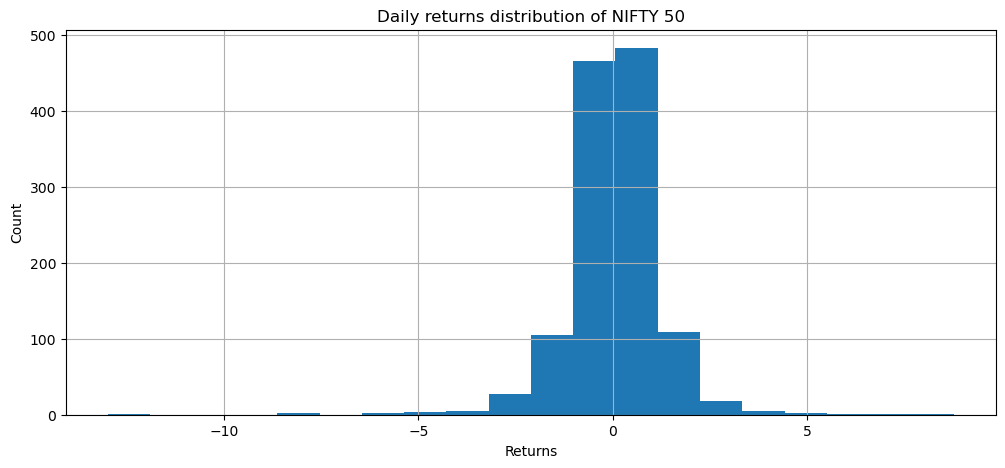

In [22]:
plt.figure(figsize=(12,5))
plt.hist(data['daily_returns'], bins=20)
plt.grid()
plt.xlabel('Returns')
plt.ylabel('Count')
plt.title("Daily returns distribution of NIFTY 50")
plt.show()

#This says that most of the days in last 5 years, index closed with 0-1% higher or lower return than previous day